In [16]:
### Installing the required packages if not already installed
packages = ['numpy', 'pandas', 'warnings', 'sqlite3', 'scipy', 'matplotlib', 'numba']

for package in packages:
    try:
        __import__(package)
    except ImportError:
        %pip install {package}

import numpy as np    # For numerical computing
import pandas as pd   # For data manipulation
import sqlite3        # For connecting to SQL database
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import skew, kurtosis
from numba import njit

### Setting the random seed for reproducibility
np.random.seed(42)

### Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Pandas display options
pd.options.display.float_format = '{:.4f}'.format

### Getting some fuctions from the other notebook
%run 99_functions.ipynb

In [17]:
### Extracting the data from the database
conn = sqlite3.connect('Data/data.db')

factor_ret_m = pd.read_sql('SELECT * FROM factors_monthly', conn).set_index('Date').drop(columns='rf')
volatility = pd.read_sql('SELECT * FROM volatility', conn).set_index('Date')
volatility_timed_factors = pd.read_sql('SELECT * FROM volatility_timed_factors', conn).set_index('Date')
volatility_timed_factors_mkt = pd.read_sql('SELECT * FROM volatility_timed_factors_mkt', conn).set_index('Date')
volatility_managed_ptf = pd.read_sql('SELECT * FROM volatility_managed_factor_ptf_outofsample', conn).set_index('Date')
MV = pd.read_sql('SELECT * FROM MV', conn).set_index('Date')

conn.close()

### Making sure all the data is in the same format
factor_ret_m.index = pd.to_datetime(factor_ret_m.index)
volatility.index = pd.to_datetime(volatility.index)
volatility_managed_ptf.index = pd.to_datetime(volatility_managed_ptf.index)
volatility_timed_factors.index = pd.to_datetime(volatility_timed_factors.index)
volatility_timed_factors_mkt.index = pd.to_datetime(volatility_timed_factors_mkt.index)
MV.index = pd.to_datetime(MV.index)

### Making all of them start from 1993-02
factor_ret_m = factor_ret_m.loc['1993-02':]
volatility = volatility.loc['1993-02':]
volatility_timed_factors = volatility_timed_factors.loc['1993-02':]
volatility_timed_factors_mkt = volatility_timed_factors_mkt.loc['1993-02':]
volatility_managed_ptf = volatility_managed_ptf.loc['1993-02':]
MV = MV.loc['1993-02':]

# Histograms

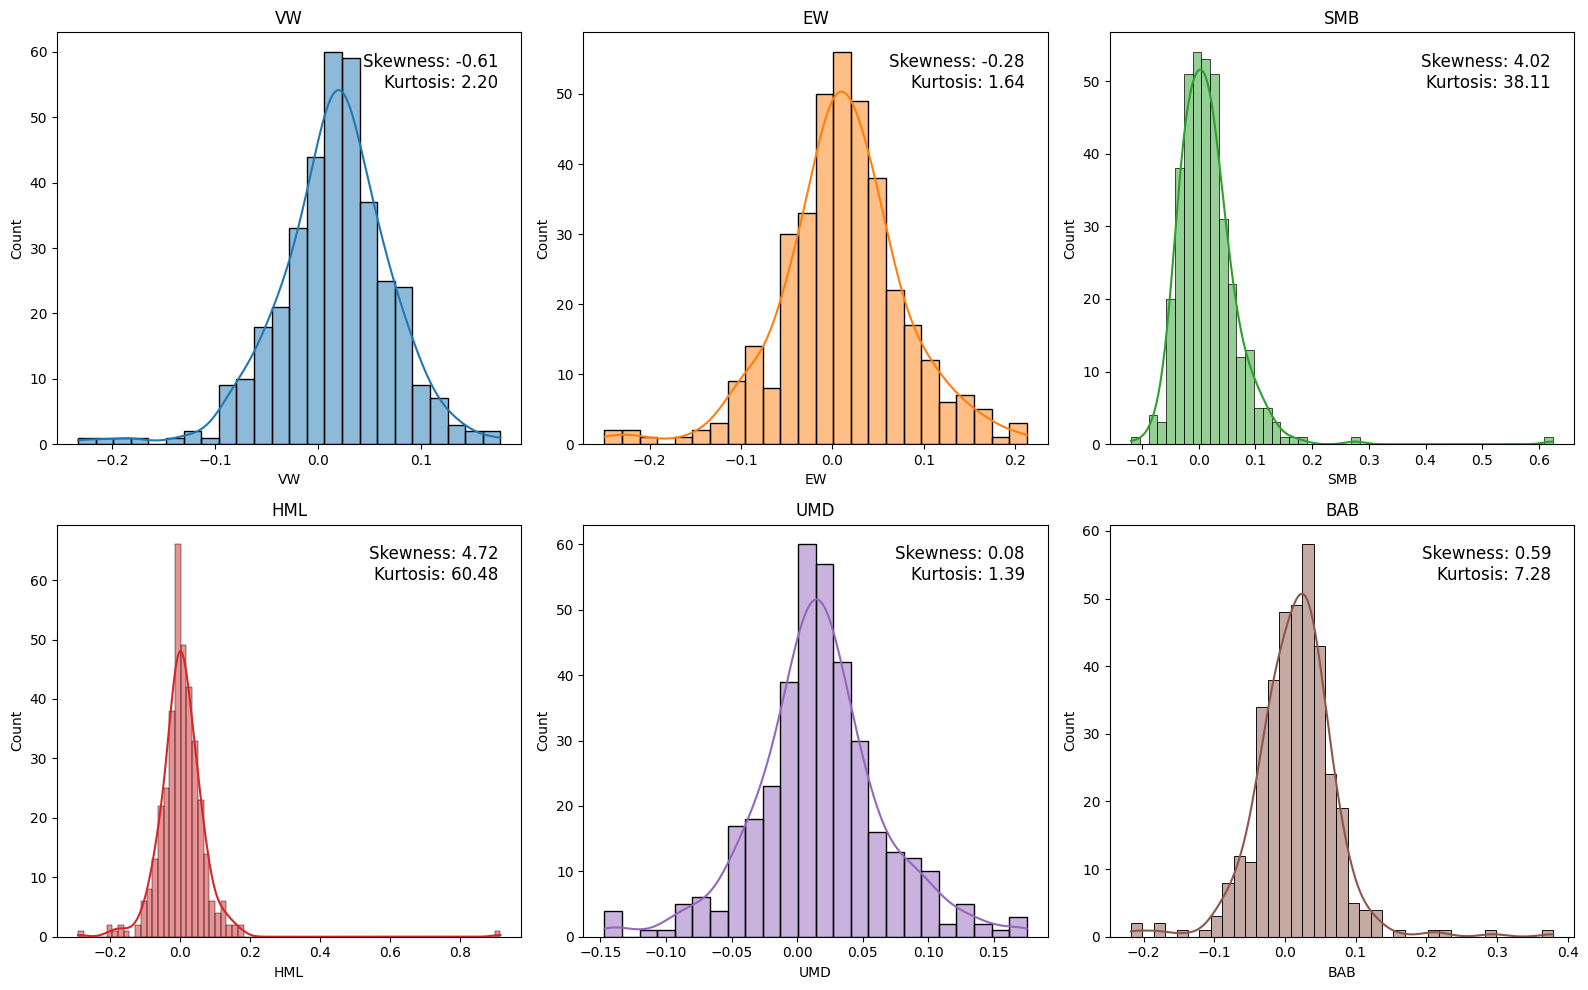

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting histograms and adding skewness and kurtosis
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    sns.histplot(factor_ret_m[factor], kde=True, ax=ax, color=color)
    ax.set_title(factor)
    skewness = skew(factor_ret_m[factor].dropna())
    kurt = kurtosis(factor_ret_m[factor].dropna())
    ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('Plots/histograms_orginal_factors.png')
plt.show()

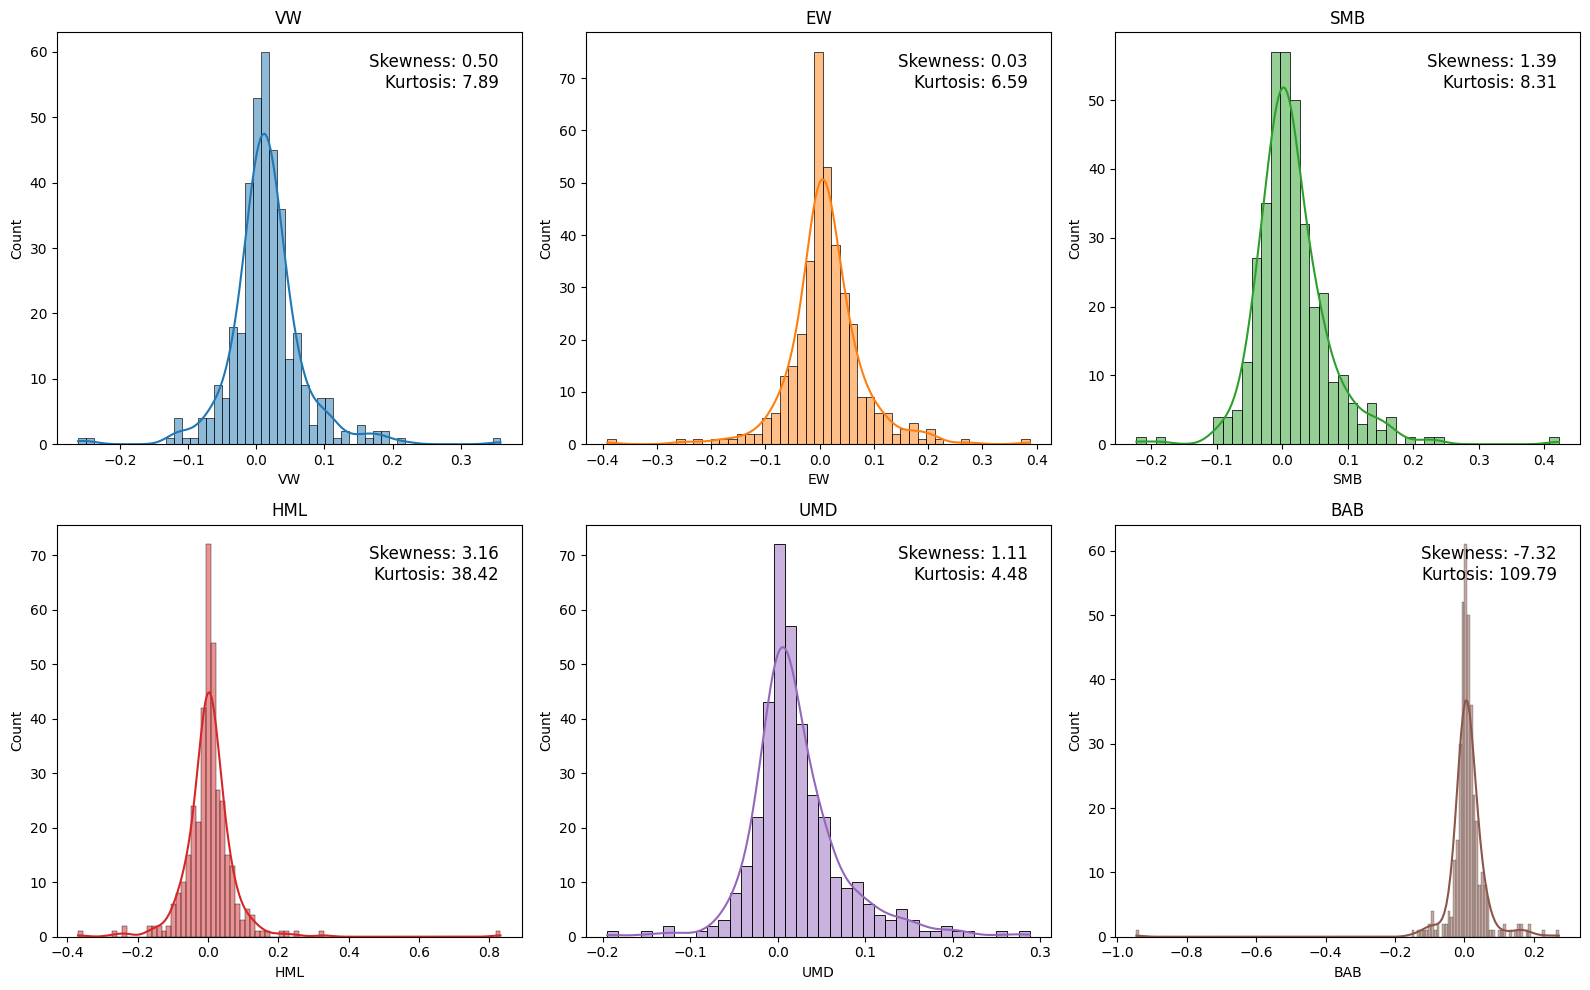

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting histograms and adding skewness and kurtosis
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    sns.histplot(volatility_timed_factors[factor], kde=True, ax=ax, color=color)
    ax.set_title(factor)
    skewness = skew(volatility_timed_factors[factor].dropna())
    kurt = kurtosis(volatility_timed_factors[factor].dropna())
    ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('Plots/histograms_voltimed_factors.png')
plt.show()

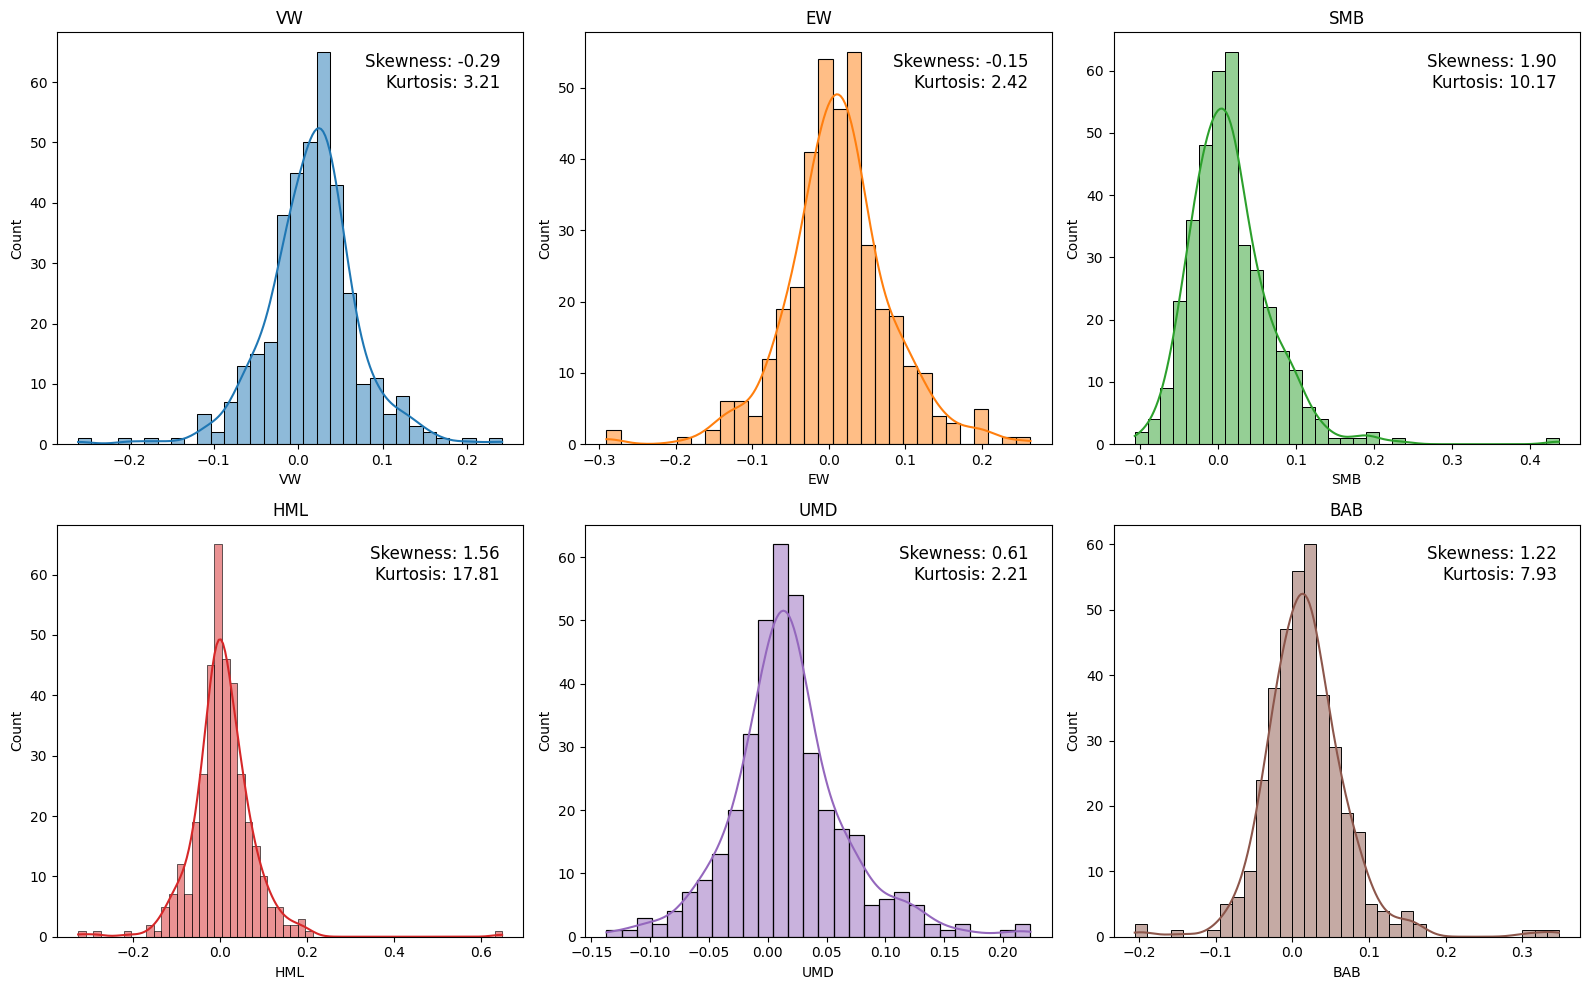

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting histograms and adding skewness and kurtosis
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    sns.histplot(volatility_timed_factors_mkt[factor], kde=True, ax=ax, color=color)
    ax.set_title(factor)
    skewness = skew(volatility_timed_factors_mkt[factor].dropna())
    kurt = kurtosis(volatility_timed_factors_mkt[factor].dropna())
    ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('Plots/histograms_voltimed_factors_mkt.png')
plt.show()

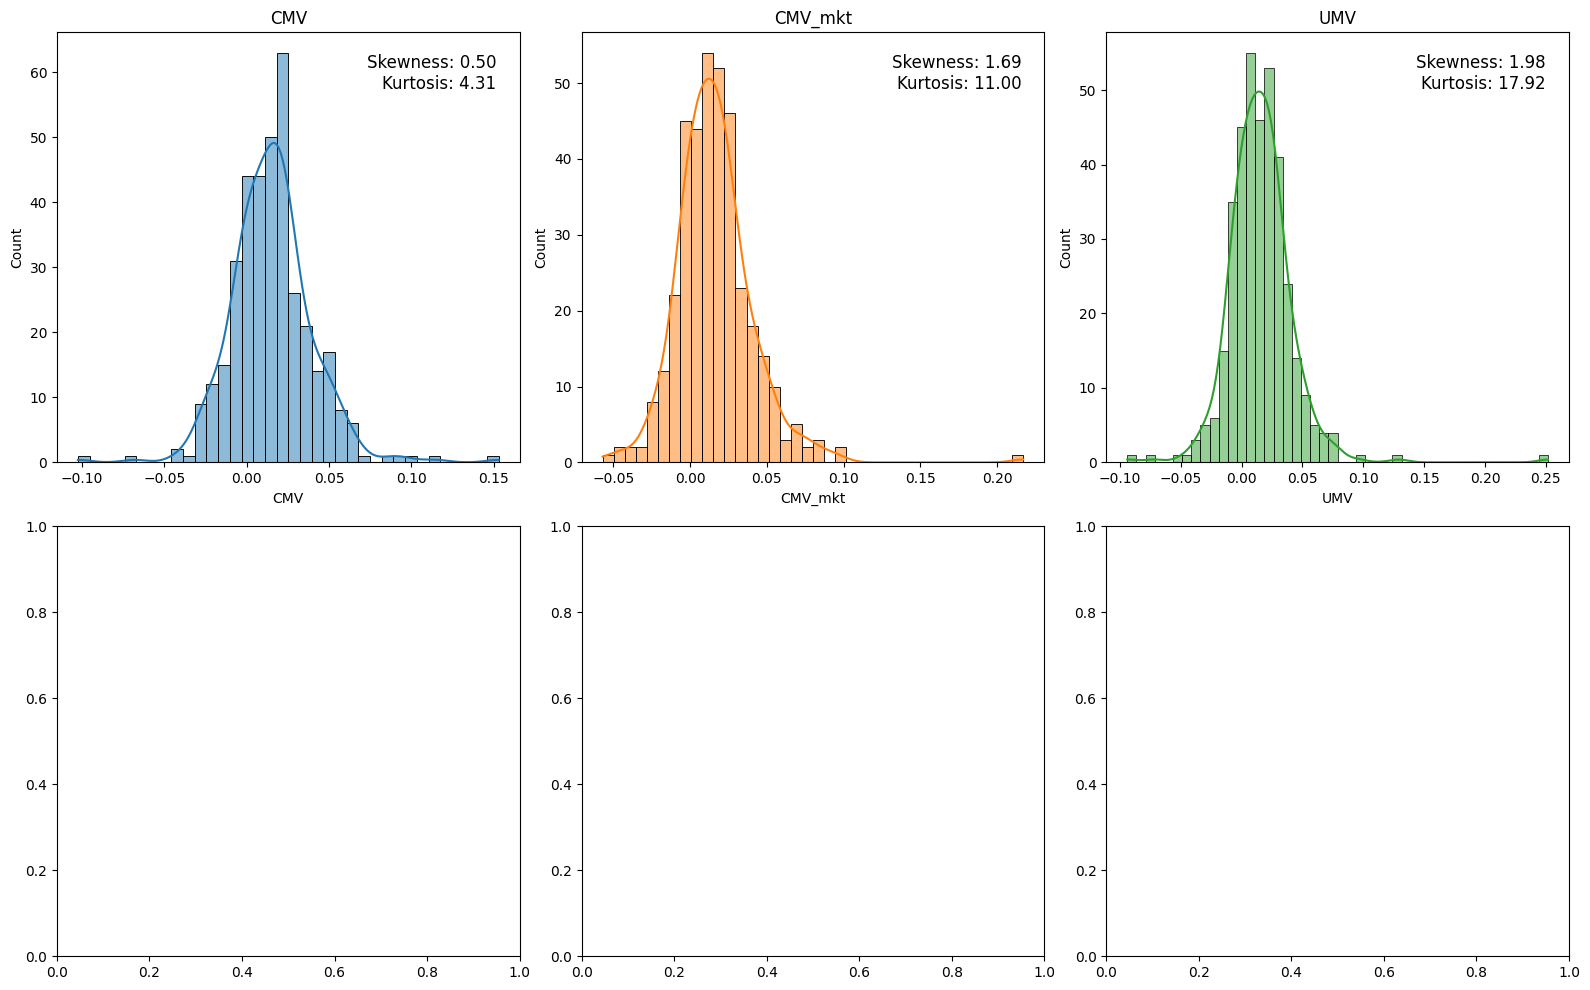

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting histograms and adding skewness and kurtosis
factors = ["CMV", "CMV_mkt", "UMV"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    sns.histplot(MV[factor], kde=True, ax=ax, color=color)
    ax.set_title(factor)
    skewness = skew(MV[factor].dropna())
    kurt = kurtosis(MV[factor].dropna())
    ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('Plots/histograms_voltimed_factors_mkt.png')
plt.show()